In [8]:
pip install pandas scipy

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
from scipy import stats

# Read the CSV file
df = pd.read_csv('Book1.csv')

In [10]:
import pandas as pd

print(df.head())

   Message count        Date Time Stamp Time Interval (HH:MM)  \
0              1  09/22/2023       7:01                  0:00   
1              2  09/22/2023       7:04                  0:03   
2              3  09/22/2023       7:09                  0:05   
3              4  09/22/2023       7:15                  0:06   
4              5  09/22/2023       7:28                  0:13   

   Time Interval (Hour in Number)  
0                         0.00000  
1                         0.05000  
2                         0.08333  
3                         0.10000  
4                         0.21667  


In [11]:
df.isnull().sum()

Message count                     0
Date                              0
Time Stamp                        0
Time Interval (HH:MM)             0
Time Interval (Hour in Number)    0
dtype: int64

In [12]:
import pandas as pd
from statistics import mean, median, mode

time_intervals = df['Time Interval (HH:MM)']

# Convert 'HH:MM' format to minutes
def convert_to_minutes(time_str):
    hours, minutes = map(int, time_str.split(':'))
    return hours * 60 + minutes

data = time_intervals.apply(convert_to_minutes)

# Calculate Mean
mean_value = mean(data)

# Calculate Median
median_value = median(data)

# Calculate Mode
try:
    mode_value = mode(data)
except:
    mode_value = "No unique mode"

# Convert mean, median, and mode back to HH:MM format
mean_hours = int(mean_value // 60)
mean_minutes = int(mean_value % 60)

median_hours = int(median_value // 60)
median_minutes = int(median_value % 60)

mode_hours = int(mode_value // 60)
mode_minutes = int(mode_value % 60)

print(f"Mean (in HH:MM format): {mean_hours:02d}:{mean_minutes:02d}")
print(f"Median (in HH:MM format): {median_hours:02d}:{median_minutes:02d}")
print(f"Mode (in HH:MM format): {mode_hours:02d}:{mode_minutes:02d}")

Mean (in HH:MM format): 00:04
Median (in HH:MM format): 00:03
Mode (in HH:MM format): 00:03


In [15]:
import pandas as pd
import numpy as np
from statistics import mean, stdev

def convert_to_minutes(time_str):
    hours, minutes = map(int, time_str.split(':'))
    return hours * 60 + minutes

data = time_intervals.apply(convert_to_minutes)

# Calculate Sample Mean
sample_mean = mean(data)

# Calculate Sample Standard Deviation
sample_std_dev = stdev(data)

# Convert mean and std_dev back to HH:MM format
mean_hours = int(sample_mean // 60)
mean_minutes = int(sample_mean % 60)

std_dev_hours = int(sample_std_dev // 60)
std_dev_minutes = int(sample_std_dev % 60)

print(f"Sample Mean (in HH:MM format): {mean_hours:02d}:{mean_minutes:02d}")
print(f"Sample Standard Deviation (in HH:MM format): {std_dev_hours:02d}:{std_dev_minutes:02d}")

Sample Mean (in HH:MM format): 00:04
Sample Standard Deviation (in HH:MM format): 00:04


In [16]:
# Calculate Quartiles and IQR
q1 = np.percentile(data, 25)
q2 = np.percentile(data, 50)
q3 = np.percentile(data, 75)
iqr = q3 - q1

# Convert quartiles and IQR back to HH:MM format
def convert_to_hhmm(minutes):
    hours = int(minutes // 60)
    minutes = int(minutes % 60)
    return f"{hours:02d}:{minutes:02d}"

q1_hhmm = convert_to_hhmm(q1)
q2_hhmm = convert_to_hhmm(q2)
q3_hhmm = convert_to_hhmm(q3)
iqr_hhmm = convert_to_hhmm(iqr)

print(f"Q1 (in HH:MM format): {q1_hhmm}")
print(f"Q2 (in HH:MM format, Median): {q2_hhmm}")
print(f"Q3 (in HH:MM format): {q3_hhmm}")
print(f"IQR (in HH:MM format): {iqr_hhmm}")

Q1 (in HH:MM format): 00:02
Q2 (in HH:MM format, Median): 00:03
Q3 (in HH:MM format): 00:05
IQR (in HH:MM format): 00:03


In [17]:
import matplotlib.pyplot as plt

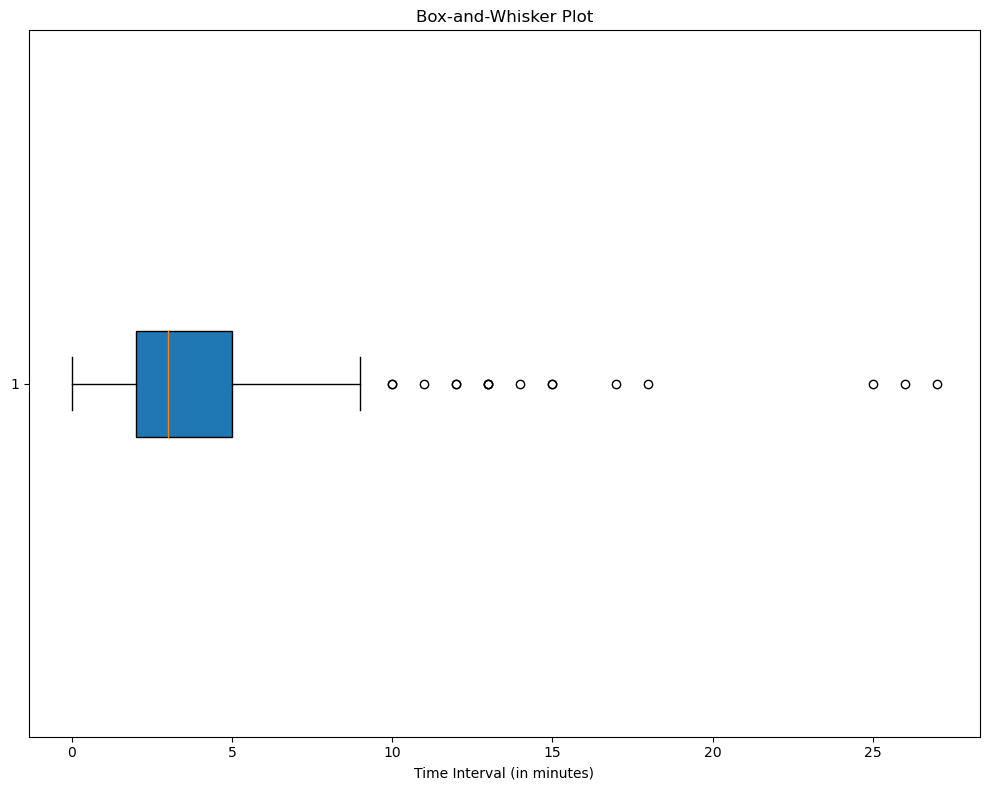

In [18]:
plt.figure(figsize=(10, 8))
plt.boxplot(data, vert=False, patch_artist=True)

# Add labels
plt.xlabel('Time Interval (in minutes)')
plt.title('Box-and-Whisker Plot')

# Show the plot
plt.tight_layout()
plt.show()

In [19]:
frequency_table = data.value_counts().reset_index()
frequency_table.columns = ['Time Interval (in minutes)', 'Frequency']

print(frequency_table)

    Time Interval (in minutes)  Frequency
0                            3         23
1                            4         21
2                            2         20
3                            1         12
4                            6         11
5                            0         10
6                            5          9
7                           13          3
8                           15          2
9                           12          2
10                           9          2
11                          10          2
12                          14          1
13                          17          1
14                          26          1
15                          11          1
16                           7          1
17                          27          1
18                          25          1
19                          18          1


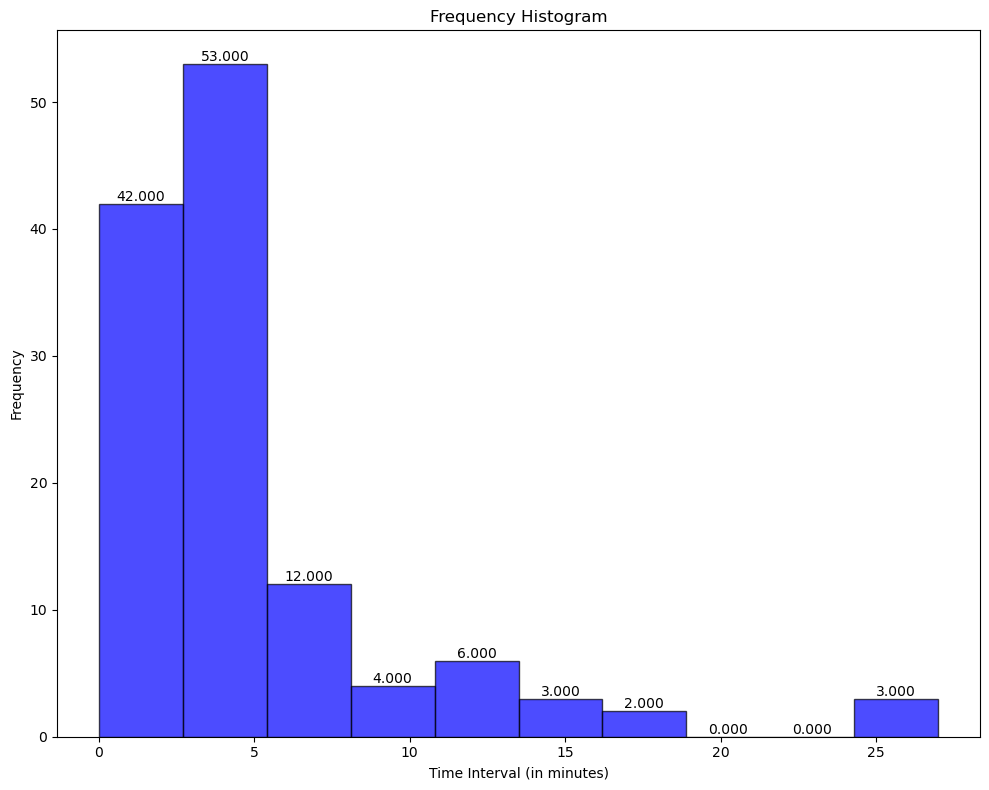

In [20]:
plt.figure(figsize=(10, 8))
counts, bins, _ = plt.hist(data, bins=10, edgecolor='black', alpha=0.7, color='blue')

# Add frequency labels on top of each bar
for count, bin_center in zip(counts, [(a + b) / 2 for a, b in zip(bins[:-1], bins[1:])]):
    plt.text(bin_center, count, f'{count:.3f}', ha='center', va='bottom', color='black', fontsize=10)

# Add labels
plt.xlabel('Time Interval (in minutes)')
plt.ylabel('Frequency')
plt.title('Frequency Histogram')

# Show the plot
plt.tight_layout()
plt.show()


In [21]:
total_data_points = len(data)
relative_frequency = data.value_counts() / total_data_points

# Calculate Cumulative Relative Frequency
cumulative_relative_frequency = relative_frequency.cumsum()

# Create a DataFrame to store the results
frequency_table = pd.DataFrame({
    'Time Interval (in minutes)': relative_frequency.index,
    'Frequency': relative_frequency.values,
    'Relative Frequency': relative_frequency.values,
    'Cumulative Relative Frequency': cumulative_relative_frequency.values
})

# Print the frequency table
print(frequency_table)


    Time Interval (in minutes)  Frequency  Relative Frequency  \
0                            3      0.184               0.184   
1                            4      0.168               0.168   
2                            2      0.160               0.160   
3                            1      0.096               0.096   
4                            6      0.088               0.088   
5                            0      0.080               0.080   
6                            5      0.072               0.072   
7                           13      0.024               0.024   
8                           15      0.016               0.016   
9                           12      0.016               0.016   
10                           9      0.016               0.016   
11                          10      0.016               0.016   
12                          14      0.008               0.008   
13                          17      0.008               0.008   
14                       

In [22]:
num_bins = 10  # You can change this value as needed

# Create the frequency table with class intervals
frequency_table = pd.cut(data, bins=num_bins, include_lowest=True, right=True, retbins=False)
frequency_table = pd.value_counts(frequency_table, sort=False).reset_index()
frequency_table.columns = ['Class Interval', 'Count']

# Calculate relative frequency
frequency_table['Relative Frequency'] = frequency_table['Count'] / len(data)

# Calculate cumulative relative frequency
frequency_table['Cumulative Relative Frequency'] = frequency_table['Relative Frequency'].cumsum()

# Print the tabular summary
print(frequency_table)

  Class Interval  Count  Relative Frequency  Cumulative Relative Frequency
0  (-0.028, 2.7]     42               0.336                          0.336
1     (2.7, 5.4]     53               0.424                          0.760
2     (5.4, 8.1]     12               0.096                          0.856
3    (8.1, 10.8]      4               0.032                          0.888
4   (10.8, 13.5]      6               0.048                          0.936
5   (13.5, 16.2]      3               0.024                          0.960
6   (16.2, 18.9]      2               0.016                          0.976
7   (18.9, 21.6]      0               0.000                          0.976
8   (21.6, 24.3]      0               0.000                          0.976
9   (24.3, 27.0]      3               0.024                          1.000


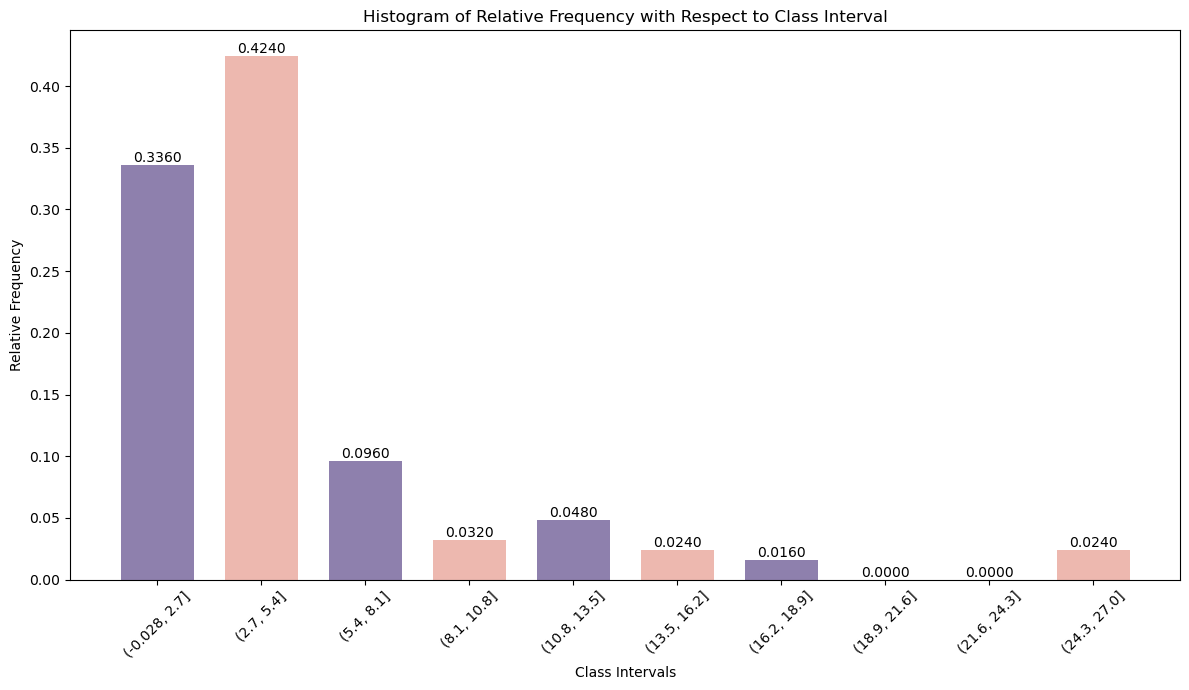

In [33]:
import matplotlib.pyplot as plt

# Assuming you have 'class_intervals' and 'relative_frequencies' defined earlier
# Assuming you have 'frequency_table' defined from previous code
class_intervals = frequency_table['Class Interval'].astype(str)
relative_frequencies = frequency_table['Relative Frequency']

# Create the histogram
plt.figure(figsize=(12, 7))
bars = plt.bar(class_intervals, relative_frequencies, width=0.7, align='center', alpha=0.7, color=['#5F4B8BFF', '#E69A8DFF'])  # Added color parameter

# Add relative frequency labels on top of each bar
for bar, freq in zip(bars, relative_frequencies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{freq:.4f}', va='bottom', ha='center', color='black', fontsize=10)

# Set labels and title
plt.xlabel('Class Intervals')
plt.ylabel('Relative Frequency')
plt.title('Histogram of Relative Frequency with Respect to Class Interval')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

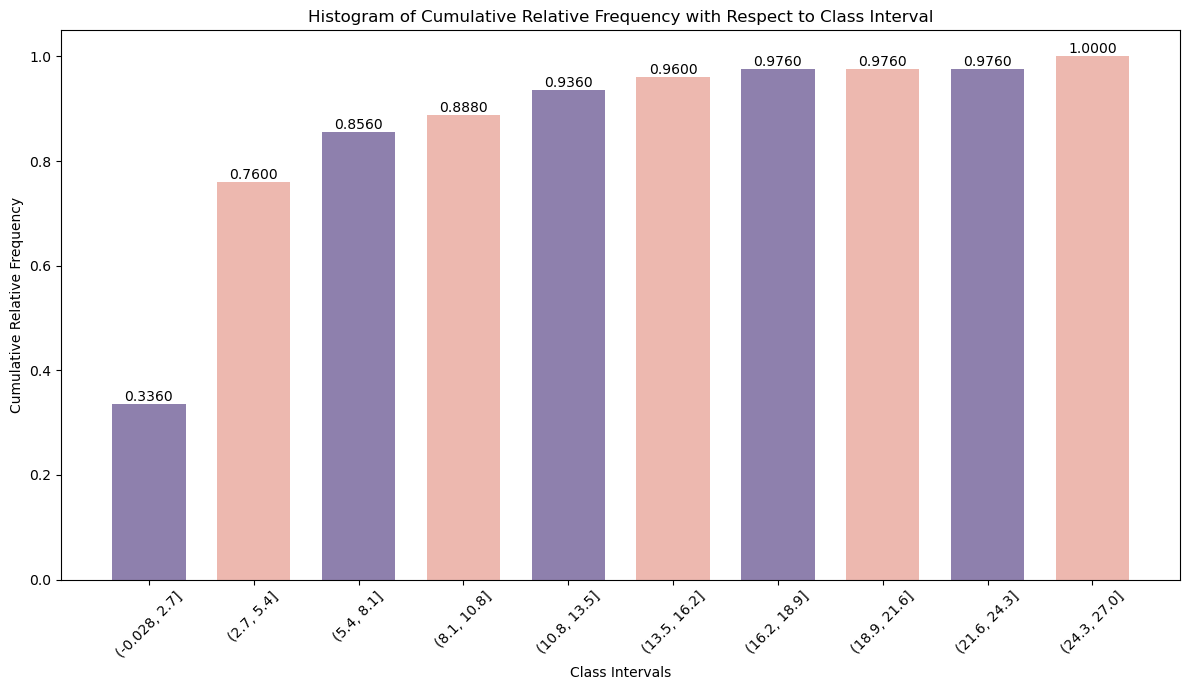

In [36]:
import matplotlib.pyplot as plt

# Assuming you have class_intervals and cumulative_relative_frequencies defined earlier
class_intervals = frequency_table['Class Interval'].astype(str)
cumulative_relative_frequencies = frequency_table['Cumulative Relative Frequency']

# Create the histogram for cumulative relative frequency
plt.figure(figsize=(12, 7))
bars = plt.bar(class_intervals, cumulative_relative_frequencies, width=0.7, align='center', alpha=0.7, color=['#5F4B8BFF', '#E69A8DFF'])  # Added color parameter

# Add cumulative relative frequency labels on top of each bar
for bar, freq in zip(bars, cumulative_relative_frequencies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{freq:.4f}', va='bottom', ha='center', color='black', fontsize=10)

# Set labels and title
plt.xlabel('Class Intervals')
plt.ylabel('Cumulative Relative Frequency')
plt.title('Histogram of Cumulative Relative Frequency with Respect to Class Interval')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [26]:
min_minutes = data.min()
max_minutes = data.max()
sample_range_minutes = max_minutes - min_minutes

# Convert back to HH:MM format
def convert_to_hhmm(minutes):
    hours = int(minutes // 60)
    minutes = int(minutes % 60)
    return f"{hours:02d}:{minutes:02d}"

min_hhmm = convert_to_hhmm(min_minutes)
max_hhmm = convert_to_hhmm(max_minutes)
sample_range_hhmm = convert_to_hhmm(sample_range_minutes)

print(f"Minimum Time Interval (HH:MM): {min_hhmm}")
print(f"Maximum Time Interval (HH:MM): {max_hhmm}")
print(f"Sample Range (HH:MM): {sample_range_hhmm}")


Minimum Time Interval (HH:MM): 00:00
Maximum Time Interval (HH:MM): 00:27
Sample Range (HH:MM): 00:27
